In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from skimage.draw import line_aa

from src.draw import *
from src.simulation import Simulation
from src.measure import Measure

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


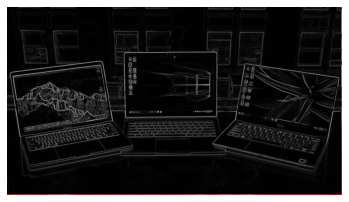

In [3]:
from src.preprocess import ImagePreprocessor

prep = ImagePreprocessor(data_folder='data/', img_name='laptop2.png')
img = prep.binarize()

In [117]:
filters = [[[0,0],[1,1]],
           [[1,0],[0,1]], 
           [[0,1],[0,1]], 
           [[0,1],[1,0]]]

def get_dissimilarity(img, filters, inds_sync):
    sim = Simulation(img, filters, 1, 0, 0)
    voltage, recovery, firings = sim.run(1000)
    
    measure = Measure(firings[inds_sync], 'victor_purpura')
    return measure.dissimilarity()

In [215]:
width = 28
height = 28
strength = 1
length = 3

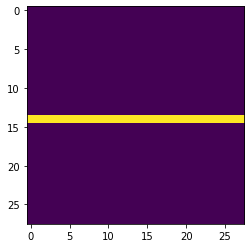

In [216]:
img1 = np.zeros(shape=(height,width))

middle_height, middle_width = height // 2, width // 2

#left horizontal line
rr_left_1, cc_left_1 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img1[rr_left_1, cc_left_1] = strength

#right horizontal line
rr_right_1, cc_right_1 = draw.line_nd((middle_height, middle_width), (middle_height, width))  
img1[rr_right_1, cc_right_1] = strength

plt.imshow(img1)
plt.show()

In [ ]:
diff1 = []
for i in range(1000):
    print('SIMULATION', i)
    sim1 = Simulation(img1, filters, 1, 0, 0)
    voltage1, recovery1, firings1 = sim1.run(1000)

    img1_coord1 = (rr_left_1[-12]+1) * width + cc_left_1[-12]
    img1_coord2 = (rr_left_1[-4]+1) * width + cc_left_1[-4]
    img1_coord3 = (rr_right_1[4]+1) * width + cc_right_1[4]

    sync1_12 = 1 - Measure([firings1[img1_coord1], firings1[img1_coord2]], 'van_rossum').dissimilarity()['mean']
    sync1_23 = 1 - Measure([firings1[img1_coord2], firings1[img1_coord3]], 'van_rossum').dissimilarity()['mean']
    diff1.append(sync1_12 - sync1_23)
    print('\n')
    
print(np.mean(diff1), np.median(diff1))

SIMULATION 0
Simulated 100 ms of braintime in 0.07950990000244929 s of computer time.
Simulated 200 ms of braintime in 0.16193899999780115 s of computer time.
Simulated 300 ms of braintime in 0.2513847000009264 s of computer time.
Simulated 400 ms of braintime in 0.34006719999888446 s of computer time.
Simulated 500 ms of braintime in 0.40746450000006007 s of computer time.
Simulated 600 ms of braintime in 0.4634583000006387 s of computer time.
Simulated 700 ms of braintime in 0.5193624999956228 s of computer time.
Simulated 800 ms of braintime in 0.5923638999956893 s of computer time.
Simulated 900 ms of braintime in 0.6883394999968004 s of computer time.
Simulation took 0.7481792999969912 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 1
Simulated 100 ms of braintime in 0.07380890000058571 s of computer time.
Simulated 200 ms of braintime in 0.14080839999951422 s of computer time.
Simulated 300 ms of braintime in 0.2078685000014957 s of computer time.
Simulated 400

Simulation took 0.7860616000034497 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 11
Simulated 100 ms of braintime in 0.08452870000473922 s of computer time.
Simulated 200 ms of braintime in 0.2648689999987255 s of computer time.
Simulated 300 ms of braintime in 0.42324760000337847 s of computer time.
Simulated 400 ms of braintime in 0.5106861000022036 s of computer time.
Simulated 500 ms of braintime in 0.5898391000009724 s of computer time.
Simulated 600 ms of braintime in 0.6602166000011493 s of computer time.
Simulated 700 ms of braintime in 0.7217956000022241 s of computer time.
Simulated 800 ms of braintime in 0.7769630000038887 s of computer time.
Simulated 900 ms of braintime in 0.8377648000023328 s of computer time.
Simulation took 0.9001620999988518 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 12
Simulated 100 ms of braintime in 0.09078310000040801 s of computer time.
Simulated 200 ms of braintime in 0.194042700000864 s of computer ti

Simulation took 0.8598923000026844 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 22
Simulated 100 ms of braintime in 0.07538530000601895 s of computer time.
Simulated 200 ms of braintime in 0.1453116000047885 s of computer time.
Simulated 300 ms of braintime in 0.22222150000015972 s of computer time.
Simulated 400 ms of braintime in 0.29587410000385717 s of computer time.
Simulated 500 ms of braintime in 0.3715922000046703 s of computer time.
Simulated 600 ms of braintime in 0.44099020000430755 s of computer time.
Simulated 700 ms of braintime in 0.5599070000025677 s of computer time.
Simulated 800 ms of braintime in 0.6364331000004313 s of computer time.
Simulated 900 ms of braintime in 0.7227882000006502 s of computer time.
Simulation took 0.8004056999998284 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 23
Simulated 100 ms of braintime in 0.07950290000007953 s of computer time.
Simulated 200 ms of braintime in 0.1466537000014796 s of computer

Simulation took 0.7935569999972358 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 33
Simulated 100 ms of braintime in 0.074405300001672 s of computer time.
Simulated 200 ms of braintime in 0.17623689999891212 s of computer time.
Simulated 300 ms of braintime in 0.28363280000485247 s of computer time.
Simulated 400 ms of braintime in 0.41060980000474956 s of computer time.
Simulated 500 ms of braintime in 0.4864692999981344 s of computer time.
Simulated 600 ms of braintime in 0.5566611000031116 s of computer time.
Simulated 700 ms of braintime in 0.6218197999987751 s of computer time.
Simulated 800 ms of braintime in 0.680192600004375 s of computer time.
Simulated 900 ms of braintime in 0.7394744999983232 s of computer time.
Simulation took 0.8183968000012101 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 34
Simulated 100 ms of braintime in 0.0656271000043489 s of computer time.
Simulated 200 ms of braintime in 0.1233563000059803 s of computer tim

Simulation took 0.9593333999946481 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 44
Simulated 100 ms of braintime in 0.0850053999965894 s of computer time.
Simulated 200 ms of braintime in 0.16068280000035884 s of computer time.
Simulated 300 ms of braintime in 0.26392309999937424 s of computer time.
Simulated 400 ms of braintime in 0.35979399999632733 s of computer time.
Simulated 500 ms of braintime in 0.43322690000059083 s of computer time.
Simulated 600 ms of braintime in 0.5096653000000515 s of computer time.
Simulated 700 ms of braintime in 0.6442666000002646 s of computer time.
Simulated 800 ms of braintime in 0.7352077000032295 s of computer time.
Simulated 900 ms of braintime in 0.842876199996681 s of computer time.
Simulation took 0.9094036000024062 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 45
Simulated 100 ms of braintime in 0.07214629999361932 s of computer time.
Simulated 200 ms of braintime in 0.13909810000041034 s of computer

Simulated 100 ms of braintime in 0.06961790000059409 s of computer time.
Simulated 200 ms of braintime in 0.1359846999985166 s of computer time.
Simulated 300 ms of braintime in 0.20431299999472685 s of computer time.
Simulated 400 ms of braintime in 0.2786320999948657 s of computer time.
Simulated 500 ms of braintime in 0.34441559999686433 s of computer time.
Simulated 600 ms of braintime in 0.4447982999990927 s of computer time.
Simulated 700 ms of braintime in 0.5076692000002367 s of computer time.
Simulated 800 ms of braintime in 0.5679898000016692 s of computer time.
Simulated 900 ms of braintime in 0.6305206999968505 s of computer time.
Simulation took 0.6899015999952098 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 56
Simulated 100 ms of braintime in 0.07782240000233287 s of computer time.
Simulated 200 ms of braintime in 0.14812440000241622 s of computer time.
Simulated 300 ms of braintime in 0.21351480000157608 s of computer time.
Simulated 400 ms of brain

Simulated 100 ms of braintime in 0.07469619999756105 s of computer time.
Simulated 200 ms of braintime in 0.1451898000013898 s of computer time.
Simulated 300 ms of braintime in 0.21405640000011772 s of computer time.
Simulated 400 ms of braintime in 0.2780048999993596 s of computer time.
Simulated 500 ms of braintime in 0.3385349000018323 s of computer time.
Simulated 600 ms of braintime in 0.3981242000008933 s of computer time.
Simulated 700 ms of braintime in 0.45873240000219084 s of computer time.
Simulated 800 ms of braintime in 0.5140279000042938 s of computer time.
Simulated 900 ms of braintime in 0.5680368000030285 s of computer time.
Simulation took 0.6211714000019128 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 67
Simulated 100 ms of braintime in 0.06767380000383127 s of computer time.
Simulated 200 ms of braintime in 0.1304424000045401 s of computer time.
Simulated 300 ms of braintime in 0.19499029999860795 s of computer time.
Simulated 400 ms of braint

Simulated 100 ms of braintime in 0.08797530000447296 s of computer time.
Simulated 200 ms of braintime in 0.15559940000093775 s of computer time.
Simulated 300 ms of braintime in 0.21721310000430094 s of computer time.
Simulated 400 ms of braintime in 0.2878926000048523 s of computer time.
Simulated 500 ms of braintime in 0.3638972000044305 s of computer time.
Simulated 600 ms of braintime in 0.42764030000398634 s of computer time.
Simulated 700 ms of braintime in 0.4852210000026389 s of computer time.
Simulated 800 ms of braintime in 0.5420947000020533 s of computer time.
Simulated 900 ms of braintime in 0.6043008000051486 s of computer time.
Simulation took 0.6658403000037652 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 78
Simulated 100 ms of braintime in 0.07178790000034496 s of computer time.
Simulated 200 ms of braintime in 0.13268239999888465 s of computer time.
Simulated 300 ms of braintime in 0.19227410000166856 s of computer time.
Simulated 400 ms of brai

Simulated 100 ms of braintime in 0.07065680000232533 s of computer time.
Simulated 200 ms of braintime in 0.12828640000225278 s of computer time.
Simulated 300 ms of braintime in 0.1859734000026947 s of computer time.
Simulated 400 ms of braintime in 0.24600240000290796 s of computer time.
Simulated 500 ms of braintime in 0.3087135000023409 s of computer time.
Simulated 600 ms of braintime in 0.3703539999987697 s of computer time.
Simulated 700 ms of braintime in 0.425203099999635 s of computer time.
Simulated 800 ms of braintime in 0.4853748000023188 s of computer time.
Simulated 900 ms of braintime in 0.54572090000147 s of computer time.
Simulation took 0.6050850000028731 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 89
Simulated 100 ms of braintime in 0.06649499999912223 s of computer time.
Simulated 200 ms of braintime in 0.12446699999418342 s of computer time.
Simulated 300 ms of braintime in 0.18296739999641431 s of computer time.
Simulated 400 ms of braintim

Simulated 100 ms of braintime in 0.07714300000225194 s of computer time.
Simulated 200 ms of braintime in 0.1477376999973785 s of computer time.
Simulated 300 ms of braintime in 0.218490400002338 s of computer time.
Simulated 400 ms of braintime in 0.29317530000116676 s of computer time.
Simulated 500 ms of braintime in 0.4168072999964352 s of computer time.
Simulated 600 ms of braintime in 0.5948289000007208 s of computer time.
Simulated 700 ms of braintime in 0.6689509999996517 s of computer time.
Simulated 800 ms of braintime in 0.7369538999992074 s of computer time.
Simulated 900 ms of braintime in 0.8394553999969503 s of computer time.
Simulation took 0.9091179999959422 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 100
Simulated 100 ms of braintime in 0.0779848000020138 s of computer time.
Simulated 200 ms of braintime in 0.1540746999962721 s of computer time.
Simulated 300 ms of braintime in 0.2349465000006603 s of computer time.
Simulated 400 ms of braintime

Simulated 100 ms of braintime in 0.08631669999886071 s of computer time.
Simulated 200 ms of braintime in 0.232224799998221 s of computer time.
Simulated 300 ms of braintime in 0.32285399999818765 s of computer time.
Simulated 400 ms of braintime in 0.38570310000068275 s of computer time.
Simulated 500 ms of braintime in 0.44467810000060126 s of computer time.
Simulated 600 ms of braintime in 0.5019113999951514 s of computer time.
Simulated 700 ms of braintime in 0.5649176000006264 s of computer time.
Simulated 800 ms of braintime in 0.6313990999988164 s of computer time.
Simulated 900 ms of braintime in 0.7052027999961865 s of computer time.
Simulation took 0.782996900001308 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 111
Simulated 100 ms of braintime in 0.09975269999995362 s of computer time.
Simulated 200 ms of braintime in 0.17832369999814546 s of computer time.
Simulated 300 ms of braintime in 0.25172059999749763 s of computer time.
Simulated 400 ms of brain

Simulated 100 ms of braintime in 0.07108840000000782 s of computer time.
Simulated 200 ms of braintime in 0.13830599999346305 s of computer time.
Simulated 300 ms of braintime in 0.20094799999787938 s of computer time.
Simulated 400 ms of braintime in 0.25916789999610046 s of computer time.
Simulated 500 ms of braintime in 0.32117929999367334 s of computer time.
Simulated 600 ms of braintime in 0.3784954000002472 s of computer time.
Simulated 700 ms of braintime in 0.4409386999977869 s of computer time.
Simulated 800 ms of braintime in 0.4971869999935734 s of computer time.
Simulated 900 ms of braintime in 0.5551007999965805 s of computer time.
Simulation took 0.6107492999944952 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 122
Simulated 100 ms of braintime in 0.07063319999724627 s of computer time.
Simulated 200 ms of braintime in 0.13869969999359455 s of computer time.
Simulated 300 ms of braintime in 0.20712039999489207 s of computer time.
Simulated 400 ms of br

Simulated 100 ms of braintime in 0.07385609999619192 s of computer time.
Simulated 200 ms of braintime in 0.16743099999439437 s of computer time.
Simulated 300 ms of braintime in 0.2594030999971437 s of computer time.
Simulated 400 ms of braintime in 0.3295940999960294 s of computer time.
Simulated 500 ms of braintime in 0.3926123999990523 s of computer time.
Simulated 600 ms of braintime in 0.45667189999949187 s of computer time.
Simulated 700 ms of braintime in 0.5272917999973288 s of computer time.
Simulated 800 ms of braintime in 0.5958762999944156 s of computer time.
Simulated 900 ms of braintime in 0.6646516999971936 s of computer time.
Simulation took 0.7373098999960348 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 133
Simulated 100 ms of braintime in 0.079103899995971 s of computer time.
Simulated 200 ms of braintime in 0.1446083999981056 s of computer time.
Simulated 300 ms of braintime in 0.20733710000058636 s of computer time.
Simulated 400 ms of brainti

Simulated 100 ms of braintime in 0.06773089999478543 s of computer time.
Simulated 200 ms of braintime in 0.13487699999677716 s of computer time.
Simulated 300 ms of braintime in 0.20157869999820832 s of computer time.
Simulated 400 ms of braintime in 0.26200539999990724 s of computer time.
Simulated 500 ms of braintime in 0.32510329999786336 s of computer time.
Simulated 600 ms of braintime in 0.38469229999464005 s of computer time.
Simulated 700 ms of braintime in 0.43953719999990426 s of computer time.
Simulated 800 ms of braintime in 0.49343869999574963 s of computer time.
Simulated 900 ms of braintime in 0.5506441999968956 s of computer time.
Simulation took 0.6064718999987235 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 144
Simulated 100 ms of braintime in 0.07157269999879645 s of computer time.
Simulated 200 ms of braintime in 0.13606739999522688 s of computer time.
Simulated 300 ms of braintime in 0.20185099999798695 s of computer time.
Simulated 400 ms of

Simulated 100 ms of braintime in 0.07568760000140173 s of computer time.
Simulated 200 ms of braintime in 0.14113689999794587 s of computer time.
Simulated 300 ms of braintime in 0.20531209999899147 s of computer time.
Simulated 400 ms of braintime in 0.26381689999834634 s of computer time.
Simulated 500 ms of braintime in 0.3252723000041442 s of computer time.
Simulated 600 ms of braintime in 0.38415949999762233 s of computer time.
Simulated 700 ms of braintime in 0.4419385000001057 s of computer time.
Simulated 800 ms of braintime in 0.5046793000001344 s of computer time.
Simulated 900 ms of braintime in 0.5645469000010053 s of computer time.
Simulation took 0.6234530000001541 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 155
Simulated 100 ms of braintime in 0.1065214999980526 s of computer time.
Simulated 200 ms of braintime in 0.18052409999654628 s of computer time.
Simulated 300 ms of braintime in 0.2435306999977911 s of computer time.
Simulated 400 ms of brai

Simulated 100 ms of braintime in 0.06758620000618976 s of computer time.
Simulated 200 ms of braintime in 0.1261235000056331 s of computer time.
Simulated 300 ms of braintime in 0.18842640000366373 s of computer time.
Simulated 400 ms of braintime in 0.25205210000422085 s of computer time.
Simulated 500 ms of braintime in 0.35164610000356333 s of computer time.
Simulated 600 ms of braintime in 0.4203157000010833 s of computer time.
Simulated 700 ms of braintime in 0.4853503000049386 s of computer time.
Simulated 800 ms of braintime in 0.5440591000005952 s of computer time.
Simulated 900 ms of braintime in 0.6451291000048514 s of computer time.
Simulation took 0.7143773999996483 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 166
Simulated 100 ms of braintime in 0.06729489999997895 s of computer time.
Simulated 200 ms of braintime in 0.1273332999990089 s of computer time.
Simulated 300 ms of braintime in 0.1869555000012042 s of computer time.
Simulated 400 ms of brain

Simulation took 0.7509152999991784 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 176
Simulated 100 ms of braintime in 0.076926599998842 s of computer time.
Simulated 200 ms of braintime in 0.1463967000017874 s of computer time.
Simulated 300 ms of braintime in 0.21412779999809572 s of computer time.
Simulated 400 ms of braintime in 0.2743464999948628 s of computer time.
Simulated 500 ms of braintime in 0.3370562999989488 s of computer time.
Simulated 600 ms of braintime in 0.4000383999955375 s of computer time.
Simulated 700 ms of braintime in 0.4599930999975186 s of computer time.
Simulated 800 ms of braintime in 0.519672399997944 s of computer time.
Simulated 900 ms of braintime in 0.5813438999975915 s of computer time.
Simulation took 0.638499699998647 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 177
Simulated 100 ms of braintime in 0.0739908999967156 s of computer time.
Simulated 200 ms of braintime in 0.14182129999971949 s of computer tim

Simulated 900 ms of braintime in 0.5410677999971085 s of computer time.
Simulation took 0.6047936999966623 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 187
Simulated 100 ms of braintime in 0.06848850000096718 s of computer time.
Simulated 200 ms of braintime in 0.12881670000206213 s of computer time.
Simulated 300 ms of braintime in 0.18936740000208374 s of computer time.
Simulated 400 ms of braintime in 0.25019759999850066 s of computer time.
Simulated 500 ms of braintime in 0.3097157000011066 s of computer time.
Simulated 600 ms of braintime in 0.37188549999700626 s of computer time.
Simulated 700 ms of braintime in 0.43105069999728585 s of computer time.
Simulated 800 ms of braintime in 0.4858292999997502 s of computer time.
Simulated 900 ms of braintime in 0.5442284000018844 s of computer time.
Simulation took 0.6086123999994015 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 188
Simulated 100 ms of braintime in 0.0685146000032546 s of compu

Simulated 900 ms of braintime in 0.5522054999964894 s of computer time.
Simulation took 0.6125124999962281 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 198
Simulated 100 ms of braintime in 0.06897839999874122 s of computer time.
Simulated 200 ms of braintime in 0.137036200001603 s of computer time.
Simulated 300 ms of braintime in 0.19937639999989187 s of computer time.
Simulated 400 ms of braintime in 0.26133049999771174 s of computer time.
Simulated 500 ms of braintime in 0.32686439999815775 s of computer time.
Simulated 600 ms of braintime in 0.3837582999985898 s of computer time.
Simulated 700 ms of braintime in 0.4803271999990102 s of computer time.
Simulated 800 ms of braintime in 0.5398838999972213 s of computer time.
Simulated 900 ms of braintime in 0.6029052000012598 s of computer time.
Simulation took 0.6652643999987049 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 199
Simulated 100 ms of braintime in 0.06716220000089379 s of compute

Simulated 900 ms of braintime in 0.9307036000027438 s of computer time.
Simulation took 0.9952492000011262 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 209
Simulated 100 ms of braintime in 0.12557390000438318 s of computer time.
Simulated 200 ms of braintime in 0.19043619999865768 s of computer time.
Simulated 300 ms of braintime in 0.2551187999997637 s of computer time.
Simulated 400 ms of braintime in 0.33508720000099856 s of computer time.
Simulated 500 ms of braintime in 0.43958030000067083 s of computer time.
Simulated 600 ms of braintime in 0.5073717000050237 s of computer time.
Simulated 700 ms of braintime in 0.574910399998771 s of computer time.
Simulated 800 ms of braintime in 0.6368529000028502 s of computer time.
Simulated 900 ms of braintime in 0.7020783000043593 s of computer time.
Simulation took 0.8218921000006958 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 210
Simulated 100 ms of braintime in 0.0909278999970411 s of computer

Simulated 900 ms of braintime in 0.5661742000011145 s of computer time.
Simulation took 0.6223180000015418 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 220
Simulated 100 ms of braintime in 0.06981680000171764 s of computer time.
Simulated 200 ms of braintime in 0.1295654000059585 s of computer time.
Simulated 300 ms of braintime in 0.18844730000273557 s of computer time.
Simulated 400 ms of braintime in 0.2498288000060711 s of computer time.
Simulated 500 ms of braintime in 0.31100490000244463 s of computer time.
Simulated 600 ms of braintime in 0.3670081000018399 s of computer time.
Simulated 700 ms of braintime in 0.4259595000039553 s of computer time.
Simulated 800 ms of braintime in 0.4884942000062438 s of computer time.
Simulated 900 ms of braintime in 0.5578597000057925 s of computer time.
Simulation took 0.6158983000059379 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 221
Simulated 100 ms of braintime in 0.06719709999742918 s of compute

Simulated 800 ms of braintime in 0.5761601999984123 s of computer time.
Simulated 900 ms of braintime in 0.6318038000026718 s of computer time.
Simulation took 0.6870036000036635 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 231
Simulated 100 ms of braintime in 0.0784432000000379 s of computer time.
Simulated 200 ms of braintime in 0.14935069999773987 s of computer time.
Simulated 300 ms of braintime in 0.22369160000380361 s of computer time.
Simulated 400 ms of braintime in 0.30571990000316873 s of computer time.
Simulated 500 ms of braintime in 0.3793246999994153 s of computer time.
Simulated 600 ms of braintime in 0.4361434000020381 s of computer time.
Simulated 700 ms of braintime in 0.4907849000010174 s of computer time.
Simulated 800 ms of braintime in 0.5568512000027113 s of computer time.
Simulated 900 ms of braintime in 0.6258736000017961 s of computer time.
Simulation took 0.6885255000015604 s
2 spike trains to compare
2 spike trains to compare


SIMULATI

Simulated 900 ms of braintime in 0.5710267000031308 s of computer time.
Simulation took 0.6308261000012862 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 242
Simulated 100 ms of braintime in 0.06876929999998538 s of computer time.
Simulated 200 ms of braintime in 0.13527500000054715 s of computer time.
Simulated 300 ms of braintime in 0.19398119999823393 s of computer time.
Simulated 400 ms of braintime in 0.2903148000041256 s of computer time.
Simulated 500 ms of braintime in 0.39551660000142874 s of computer time.
Simulated 600 ms of braintime in 0.4616165000043111 s of computer time.
Simulated 700 ms of braintime in 0.5330228000020725 s of computer time.
Simulated 800 ms of braintime in 0.60299450000457 s of computer time.
Simulated 900 ms of braintime in 0.7026863999999478 s of computer time.
Simulation took 0.8006717000025674 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 243
Simulated 100 ms of braintime in 0.08860660000209464 s of computer

Simulated 800 ms of braintime in 0.5438951999967685 s of computer time.
Simulated 900 ms of braintime in 0.6079800000006799 s of computer time.
Simulation took 0.6655336999974679 s
2 spike trains to compare
2 spike trains to compare


SIMULATION 253
Simulated 100 ms of braintime in 0.07370499999524327 s of computer time.
Simulated 200 ms of braintime in 0.14453749999665888 s of computer time.
Simulated 300 ms of braintime in 0.21554709999327315 s of computer time.
Simulated 400 ms of braintime in 0.28272979999746894 s of computer time.
Simulated 500 ms of braintime in 0.34762799999589333 s of computer time.
Simulated 600 ms of braintime in 0.4105199999976321 s of computer time.
Simulated 700 ms of braintime in 0.46988969999802066 s of computer time.
Simulated 800 ms of braintime in 0.5292307999989134 s of computer time.
Simulated 900 ms of braintime in 0.5955472999994527 s of computer time.
Simulation took 0.6953505999990739 s
2 spike trains to compare
2 spike trains to compare


SIMUL

In [ ]:
img2 = np.zeros(shape=(height,width))

#left horizontal line
rr_left_2, cc_left_2 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img2[rr_left_2, cc_left_2] = strength

#right horizontal line
rr_right_2, cc_right_2 = draw.line_nd((middle_height, middle_width), (0, width))  
img2[rr_right_2, cc_right_2] = strength

plt.imshow(img2)
plt.show()

In [228]:
for i,f in enumerate(firings2):
    if len(np.nonzero(f)[0]) > 0 and i > 500:
        print(i)
        
img2_coord1, img2_coord2, img2_coord3

2435
2462
2489
2516
2543
2570
2597
2624
2651
2678
2705
2732
2759


(422, 430, 2678)

In [ ]:
diff2 = []

for i in range(1000):
    print('SIMULATION', i)
    sim2 = Simulation(img2, filters, 1, 0, 0)
    voltage2, recovery2, firings2 = sim2.run(1000)

    img2_coord1 = (rr_left_2[-12]+1) * width + cc_left_2[-12]
    img2_coord2 = (rr_left_2[-4]+1) * width + cc_left_2[-4]
    img2_coord3 = (rr_right_2[4]+1) * width + cc_right_2[4] + width*height*3

    sync2_12 = 1 - Measure([firings2[img2_coord1], firings2[img2_coord2]], 'van_rossum').dissimilarity()['mean']
    sync2_23 = 1 - Measure([firings2[img2_coord2], firings2[img2_coord3]], 'van_rossum').dissimilarity()['mean']
    diff2.append(sync2_12 - sync2_23)
    print('\n')
    
print(np.mean(diff2), np.median(diff2))

In [220]:
#diff - how much 1-2 (same part) synchrony is greater than 2-3 (different parts) synchrony

In [ ]:
img3 = np.zeros(shape=(height,width))

#left horizontal line
rr_left_3, cc_left_3 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img3[rr_left_3, cc_left_3] = strength

#right horizontal line
rr_right_3, cc_right_3 = draw.line_nd((middle_height, middle_width), (0, middle_width))  
img3[rr_right_3, cc_right_3] = strength

plt.imshow(img3)
plt.show()

In [ ]:
diff3 = []

for i in range(1000):
    print('SIMULATION', i)
    sim3 = Simulation(img3, filters, 1, 0, 0)
    voltage3, recovery3, firings3 = sim3.run(1000)

    img3_coord1 = (rr_left_3[-12]+1) * width + cc_left_3[-12]
    img3_coord2 = (rr_left_3[-4]+1) * width + cc_left_3[-4]
    img3_coord3 = (rr_right_3[4]+1) * width + cc_right_3[4] + width*height*2 + 1

    sync3_12 = 1 - Measure([firings3[img3_coord1], firings3[img3_coord2]], 'van_rossum').dissimilarity()['mean']
    sync3_23 = 1 - Measure([firings3[img3_coord2], firings3[img3_coord3]], 'van_rossum').dissimilarity()['mean']
    diff3.append(sync3_12 - sync3_23)
    print('\n')
    
print(np.mean(diff3), np.median(diff3))

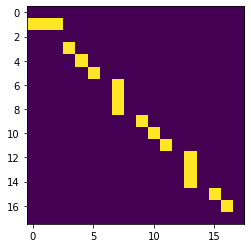

In [5]:
width = 18
height = 18
strength = 1
length = 3

img = line_45_disjoint(width=width, height=height, strength=strength, length=length)
plt.imshow(img)
plt.show()

In [210]:
get_dissimilarity(img, filters, inds_sync)

Simulated 100 ms of braintime in 0.04048039999906905 s of computer time.
Simulated 200 ms of braintime in 0.0749156999954721 s of computer time.
Simulated 300 ms of braintime in 0.10657249999349006 s of computer time.
Simulated 400 ms of braintime in 0.1375361999962479 s of computer time.
Simulated 500 ms of braintime in 0.16730769999412587 s of computer time.
Simulated 600 ms of braintime in 0.1985685999970883 s of computer time.
Simulated 700 ms of braintime in 0.23190049999539042 s of computer time.
Simulated 800 ms of braintime in 0.26796489999833284 s of computer time.
Simulated 900 ms of braintime in 0.3015382999947178 s of computer time.
Simulation took 0.3332846999983303 s
272 spike trains to compare


{'median': 0.0, 'mean': 1.3510004069893642, 'max': 23.0, 'min': 0.0}

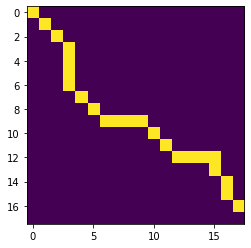

In [143]:
img5 = line_45_joint(width=width, height=height, strength=strength, length=length)
plt.imshow(img5)
plt.show()

In [176]:
all_mean5, all_med5 = [], []

for i in range(100):
    print('SIMULATION', i)
    sim5 = Simulation(img5, filters, 1, 0, 0)
    voltage5, recovery5, firings5 = sim5.run(1000)
    fired = []

    for i,f in enumerate(firings5):
        if len(np.nonzero(f)[0]) > 0:
            fired.append(i)       
    measure6 = Measure(firings5[fired], 'van_rossum')
    all_mean5.append(measure5.dissimilarity()['mean'])
    all_med5.append(measure5.dissimilarity()['median'])
    print('\n')
    
print(np.mean(all_mean5), np.median(all_mean5))
print(np.mean(all_med5), np.median(all_med5))

SIMULATION 0
Simulated 100 ms of braintime in 0.037053000000014435 s of computer time.
Simulated 200 ms of braintime in 0.07106750000002648 s of computer time.
Simulated 300 ms of braintime in 0.10579799999959505 s of computer time.
Simulated 400 ms of braintime in 0.14597299999968527 s of computer time.
Simulated 500 ms of braintime in 0.1822766999994201 s of computer time.
Simulated 600 ms of braintime in 0.251390899999933 s of computer time.
Simulated 700 ms of braintime in 0.3057137999994666 s of computer time.
Simulated 800 ms of braintime in 0.34790629999952216 s of computer time.
Simulated 900 ms of braintime in 0.3846033999998326 s of computer time.
Simulation took 0.4295650999993086 s
23 spike trains to compare


SIMULATION 1
Simulated 100 ms of braintime in 0.03546160000041709 s of computer time.
Simulated 200 ms of braintime in 0.06553640000038286 s of computer time.
Simulated 300 ms of braintime in 0.09600460000001476 s of computer time.
Simulated 400 ms of braintime in 0.1

Simulated 500 ms of braintime in 0.16118899999946734 s of computer time.
Simulated 600 ms of braintime in 0.18976269999984652 s of computer time.
Simulated 700 ms of braintime in 0.2205535000002783 s of computer time.
Simulated 800 ms of braintime in 0.24721870000030322 s of computer time.
Simulated 900 ms of braintime in 0.2736887000000934 s of computer time.
Simulation took 0.2995756000000256 s
23 spike trains to compare


SIMULATION 12
Simulated 100 ms of braintime in 0.03598409999995056 s of computer time.
Simulated 200 ms of braintime in 0.06669640000018262 s of computer time.
Simulated 300 ms of braintime in 0.09478440000020782 s of computer time.
Simulated 400 ms of braintime in 0.12351760000001377 s of computer time.
Simulated 500 ms of braintime in 0.15685899999971298 s of computer time.
Simulated 600 ms of braintime in 0.185065300000133 s of computer time.
Simulated 700 ms of braintime in 0.2169168999998874 s of computer time.
Simulated 800 ms of braintime in 0.24371140000039

Simulated 800 ms of braintime in 0.33632919999945443 s of computer time.
Simulated 900 ms of braintime in 0.37758949999988545 s of computer time.
Simulation took 0.4129066999994393 s
23 spike trains to compare


SIMULATION 23
Simulated 100 ms of braintime in 0.03642429999945307 s of computer time.
Simulated 200 ms of braintime in 0.08240750000004482 s of computer time.
Simulated 300 ms of braintime in 0.13193580000006477 s of computer time.
Simulated 400 ms of braintime in 0.17582929999935004 s of computer time.
Simulated 500 ms of braintime in 0.23007679999955144 s of computer time.
Simulated 600 ms of braintime in 0.28369179999936023 s of computer time.
Simulated 700 ms of braintime in 0.32508919999963837 s of computer time.
Simulated 800 ms of braintime in 0.3631672999999864 s of computer time.
Simulated 900 ms of braintime in 0.4045317999998588 s of computer time.
Simulation took 0.44131519999973534 s
23 spike trains to compare


SIMULATION 24
Simulated 100 ms of braintime in 0.054



SIMULATION 34
Simulated 100 ms of braintime in 0.03978819999974803 s of computer time.
Simulated 200 ms of braintime in 0.07934599999953207 s of computer time.
Simulated 300 ms of braintime in 0.12229909999950905 s of computer time.
Simulated 400 ms of braintime in 0.15884149999965302 s of computer time.
Simulated 500 ms of braintime in 0.19256299999960902 s of computer time.
Simulated 600 ms of braintime in 0.22743369999989227 s of computer time.
Simulated 700 ms of braintime in 0.26176759999998467 s of computer time.
Simulated 800 ms of braintime in 0.295999999999367 s of computer time.
Simulated 900 ms of braintime in 0.32874619999984134 s of computer time.
Simulation took 0.3607715999996799 s
23 spike trains to compare


SIMULATION 35
Simulated 100 ms of braintime in 0.05140190000020084 s of computer time.
Simulated 200 ms of braintime in 0.1179666999996698 s of computer time.
Simulated 300 ms of braintime in 0.17102710000017396 s of computer time.
Simulated 400 ms of braintime i

Simulated 500 ms of braintime in 0.1700447000002896 s of computer time.
Simulated 600 ms of braintime in 0.22346399999969435 s of computer time.
Simulated 700 ms of braintime in 0.2663487999998324 s of computer time.
Simulated 800 ms of braintime in 0.29696919999969396 s of computer time.
Simulated 900 ms of braintime in 0.32972500000050786 s of computer time.
Simulation took 0.3808767999998963 s
23 spike trains to compare


SIMULATION 46
Simulated 100 ms of braintime in 0.03789549999964947 s of computer time.
Simulated 200 ms of braintime in 0.070252999999866 s of computer time.
Simulated 300 ms of braintime in 0.10203860000001441 s of computer time.
Simulated 400 ms of braintime in 0.13607409999985975 s of computer time.
Simulated 500 ms of braintime in 0.17331169999943086 s of computer time.
Simulated 600 ms of braintime in 0.22870770000008633 s of computer time.
Simulated 700 ms of braintime in 0.2626183000002129 s of computer time.
Simulated 800 ms of braintime in 0.29591309999977

23 spike trains to compare


SIMULATION 57
Simulated 100 ms of braintime in 0.03510490000007849 s of computer time.
Simulated 200 ms of braintime in 0.06433379999998579 s of computer time.
Simulated 300 ms of braintime in 0.09232239999982994 s of computer time.
Simulated 400 ms of braintime in 0.12081119999947987 s of computer time.
Simulated 500 ms of braintime in 0.15056339999955526 s of computer time.
Simulated 600 ms of braintime in 0.1778865999995105 s of computer time.
Simulated 700 ms of braintime in 0.20460279999952036 s of computer time.
Simulated 800 ms of braintime in 0.23357279999981984 s of computer time.
Simulated 900 ms of braintime in 0.26098849999925733 s of computer time.
Simulation took 0.2914206999994349 s
23 spike trains to compare


SIMULATION 58
Simulated 100 ms of braintime in 0.03424139999970066 s of computer time.
Simulated 200 ms of braintime in 0.06256319999920379 s of computer time.
Simulated 300 ms of braintime in 0.09057139999913488 s of computer time.
Si

Simulated 300 ms of braintime in 0.13384419999965758 s of computer time.
Simulated 400 ms of braintime in 0.1667381999995996 s of computer time.
Simulated 500 ms of braintime in 0.1952819999996791 s of computer time.
Simulated 600 ms of braintime in 0.22173269999984768 s of computer time.
Simulated 700 ms of braintime in 0.24745549999988725 s of computer time.
Simulated 800 ms of braintime in 0.273435399999471 s of computer time.
Simulated 900 ms of braintime in 0.30285249999997177 s of computer time.
Simulation took 0.32979709999926854 s
23 spike trains to compare


SIMULATION 69
Simulated 100 ms of braintime in 0.04075550000015937 s of computer time.
Simulated 200 ms of braintime in 0.08090400000037334 s of computer time.
Simulated 300 ms of braintime in 0.1178079000001162 s of computer time.
Simulated 400 ms of braintime in 0.18077890000040497 s of computer time.
Simulated 500 ms of braintime in 0.22686659999999392 s of computer time.
Simulated 600 ms of braintime in 0.2639372000003

Simulated 500 ms of braintime in 0.22922819999985222 s of computer time.
Simulated 600 ms of braintime in 0.3087660999999571 s of computer time.
Simulated 700 ms of braintime in 0.3702751000000717 s of computer time.
Simulated 800 ms of braintime in 0.40720779999992374 s of computer time.
Simulated 900 ms of braintime in 0.44217029999981605 s of computer time.
Simulation took 0.4803401999997732 s
23 spike trains to compare


SIMULATION 80
Simulated 100 ms of braintime in 0.038487699999677716 s of computer time.
Simulated 200 ms of braintime in 0.07658039999932953 s of computer time.
Simulated 300 ms of braintime in 0.11274830000002112 s of computer time.
Simulated 400 ms of braintime in 0.1540696999991269 s of computer time.
Simulated 500 ms of braintime in 0.19156549999934214 s of computer time.
Simulated 600 ms of braintime in 0.22578649999923073 s of computer time.
Simulated 700 ms of braintime in 0.2595670999999129 s of computer time.
Simulated 800 ms of braintime in 0.297013399999

Simulation took 0.3529843999995137 s
23 spike trains to compare


SIMULATION 91
Simulated 100 ms of braintime in 0.04850059999989753 s of computer time.
Simulated 200 ms of braintime in 0.09441900000001624 s of computer time.
Simulated 300 ms of braintime in 0.14219869999942603 s of computer time.
Simulated 400 ms of braintime in 0.19923799999924086 s of computer time.
Simulated 500 ms of braintime in 0.2520091999995202 s of computer time.
Simulated 600 ms of braintime in 0.29776849999961996 s of computer time.
Simulated 700 ms of braintime in 0.3528024999995978 s of computer time.
Simulated 800 ms of braintime in 0.400931700000001 s of computer time.
Simulated 900 ms of braintime in 0.44346589999986463 s of computer time.
Simulation took 0.49330019999979413 s
23 spike trains to compare


SIMULATION 92
Simulated 100 ms of braintime in 0.03599900000062917 s of computer time.
Simulated 200 ms of braintime in 0.06833730000016658 s of computer time.
Simulated 300 ms of braintime in 0.10185

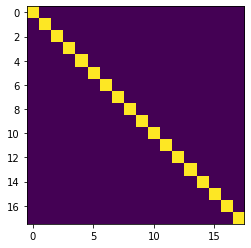

In [159]:
img6 = np.zeros(shape=(height,width))

rr, cc = draw.line_nd((0, 0), (height, width))  
img6[rr, cc] = strength

plt.imshow(img6)
plt.show()

In [178]:
all_mean6, all_med6 = [], []

for i in range(100):
    print('SIMULATION', i)
    sim6 = Simulation(img6, filters, 1, 0, 0)
    voltage6, recovery6, firings6 = sim6.run(1000)
    fired = []

    for i,f in enumerate(firings6):
        if len(np.nonzero(f)[0]) > 0:
            fired.append(i)      
    measure6 = Measure(firings6[fired], 'van_rossum')
    all_mean6.append(measure6.dissimilarity()['mean'])
    all_med6.append(measure6.dissimilarity()['median'])
    print('\n')   
    
print(np.mean(all_mean6), np.median(all_mean6))
print(np.mean(all_med6), np.median(all_med6))

SIMULATION 0
Simulated 100 ms of braintime in 0.04466060000049765 s of computer time.
Simulated 200 ms of braintime in 0.08571159999974043 s of computer time.
Simulated 300 ms of braintime in 0.14019590000043536 s of computer time.
Simulated 400 ms of braintime in 0.18592270000044664 s of computer time.
Simulated 500 ms of braintime in 0.2570614000005662 s of computer time.
Simulated 600 ms of braintime in 0.2992439999998169 s of computer time.
Simulated 700 ms of braintime in 0.3356885000002876 s of computer time.
Simulated 800 ms of braintime in 0.38030350000008184 s of computer time.
Simulated 900 ms of braintime in 0.4208089000003383 s of computer time.
Simulation took 0.4628186999998434 s
17 spike trains to compare


SIMULATION 1
Simulated 100 ms of braintime in 0.06388059999972029 s of computer time.
Simulated 200 ms of braintime in 0.14776510000046983 s of computer time.
Simulated 300 ms of braintime in 0.2462004999997589 s of computer time.
Simulated 400 ms of braintime in 0.30

Simulated 300 ms of braintime in 0.153549199999361 s of computer time.
Simulated 400 ms of braintime in 0.21475599999939732 s of computer time.
Simulated 500 ms of braintime in 0.25548519999938435 s of computer time.
Simulated 600 ms of braintime in 0.29364279999936116 s of computer time.
Simulated 700 ms of braintime in 0.3290944000000309 s of computer time.
Simulated 800 ms of braintime in 0.3638997999996718 s of computer time.
Simulated 900 ms of braintime in 0.40152760000000853 s of computer time.
Simulation took 0.4350187999998525 s
17 spike trains to compare


SIMULATION 12
Simulated 100 ms of braintime in 0.053640500000256 s of computer time.
Simulated 200 ms of braintime in 0.10531270000046788 s of computer time.
Simulated 300 ms of braintime in 0.15557820000049105 s of computer time.
Simulated 400 ms of braintime in 0.20398999999997613 s of computer time.
Simulated 500 ms of braintime in 0.24698300000000017 s of computer time.
Simulated 600 ms of braintime in 0.293803900000057

17 spike trains to compare


SIMULATION 23
Simulated 100 ms of braintime in 0.04356240000015532 s of computer time.
Simulated 200 ms of braintime in 0.08206680000057531 s of computer time.
Simulated 300 ms of braintime in 0.1266263000006802 s of computer time.
Simulated 400 ms of braintime in 0.19986030000018218 s of computer time.
Simulated 500 ms of braintime in 0.2478547000000617 s of computer time.
Simulated 600 ms of braintime in 0.3120232000001124 s of computer time.
Simulated 700 ms of braintime in 0.3747508000005837 s of computer time.
Simulated 800 ms of braintime in 0.4158024000007572 s of computer time.
Simulated 900 ms of braintime in 0.45349200000055134 s of computer time.
Simulation took 0.5205985000002329 s
17 spike trains to compare


SIMULATION 24
Simulated 100 ms of braintime in 0.04447600000003149 s of computer time.
Simulated 200 ms of braintime in 0.0871700999996392 s of computer time.
Simulated 300 ms of braintime in 0.12474089999977878 s of computer time.
Simulat

Simulated 500 ms of braintime in 0.17337160000079166 s of computer time.
Simulated 600 ms of braintime in 0.20707230000061827 s of computer time.
Simulated 700 ms of braintime in 0.23700670000016544 s of computer time.
Simulated 800 ms of braintime in 0.2672056999999768 s of computer time.
Simulated 900 ms of braintime in 0.29760280000027706 s of computer time.
Simulation took 0.32720530000005965 s
17 spike trains to compare


SIMULATION 35
Simulated 100 ms of braintime in 0.03717309999956342 s of computer time.
Simulated 200 ms of braintime in 0.07378799999969488 s of computer time.
Simulated 300 ms of braintime in 0.11105609999958688 s of computer time.
Simulated 400 ms of braintime in 0.1452779000001101 s of computer time.
Simulated 500 ms of braintime in 0.18507769999996526 s of computer time.
Simulated 600 ms of braintime in 0.22238259999994625 s of computer time.
Simulated 700 ms of braintime in 0.26402319999942847 s of computer time.
Simulated 800 ms of braintime in 0.3004227999

Simulation took 0.34909349999998085 s
17 spike trains to compare


SIMULATION 46
Simulated 100 ms of braintime in 0.038118600000416336 s of computer time.
Simulated 200 ms of braintime in 0.07095380000009754 s of computer time.
Simulated 300 ms of braintime in 0.10736640000050102 s of computer time.
Simulated 400 ms of braintime in 0.1411920000000464 s of computer time.
Simulated 500 ms of braintime in 0.17276649999985239 s of computer time.
Simulated 600 ms of braintime in 0.2035001000003831 s of computer time.
Simulated 700 ms of braintime in 0.23286480000024312 s of computer time.
Simulated 800 ms of braintime in 0.26474580000012793 s of computer time.
Simulated 900 ms of braintime in 0.2955038999998578 s of computer time.
Simulation took 0.33016700000007404 s
17 spike trains to compare


SIMULATION 47
Simulated 100 ms of braintime in 0.03798379999989265 s of computer time.
Simulated 200 ms of braintime in 0.07168559999990975 s of computer time.
Simulated 300 ms of braintime in 0.10

Simulated 400 ms of braintime in 0.14561420000063663 s of computer time.
Simulated 500 ms of braintime in 0.18310329999985697 s of computer time.
Simulated 600 ms of braintime in 0.21802410000054806 s of computer time.
Simulated 700 ms of braintime in 0.2548467000005985 s of computer time.
Simulated 800 ms of braintime in 0.2886820000003354 s of computer time.
Simulated 900 ms of braintime in 0.32010300000001735 s of computer time.
Simulation took 0.3573679000000993 s
17 spike trains to compare


SIMULATION 58
Simulated 100 ms of braintime in 0.036217300000316754 s of computer time.
Simulated 200 ms of braintime in 0.06900360000054206 s of computer time.
Simulated 300 ms of braintime in 0.1021310000005542 s of computer time.
Simulated 400 ms of braintime in 0.13366930000029242 s of computer time.
Simulated 500 ms of braintime in 0.16723180000008142 s of computer time.
Simulated 600 ms of braintime in 0.19601740000052814 s of computer time.
Simulated 700 ms of braintime in 0.22580740000

Simulated 900 ms of braintime in 0.3537685000001147 s of computer time.
Simulation took 0.428666499999963 s
17 spike trains to compare


SIMULATION 69
Simulated 100 ms of braintime in 0.03770950000034645 s of computer time.
Simulated 200 ms of braintime in 0.074590299999727 s of computer time.
Simulated 300 ms of braintime in 0.11271930000020802 s of computer time.
Simulated 400 ms of braintime in 0.15960769999946933 s of computer time.
Simulated 500 ms of braintime in 0.20287009999992733 s of computer time.
Simulated 600 ms of braintime in 0.24894680000033986 s of computer time.
Simulated 700 ms of braintime in 0.31084349999946426 s of computer time.
Simulated 800 ms of braintime in 0.347458899999765 s of computer time.
Simulated 900 ms of braintime in 0.3783186000000569 s of computer time.
Simulation took 0.40712789999997767 s
17 spike trains to compare


SIMULATION 70
Simulated 100 ms of braintime in 0.037053300000479794 s of computer time.
Simulated 200 ms of braintime in 0.0687418



SIMULATION 80
Simulated 100 ms of braintime in 0.036178699999254604 s of computer time.
Simulated 200 ms of braintime in 0.06743839999944612 s of computer time.
Simulated 300 ms of braintime in 0.10256359999948472 s of computer time.
Simulated 400 ms of braintime in 0.13682319999952597 s of computer time.
Simulated 500 ms of braintime in 0.16849719999936497 s of computer time.
Simulated 600 ms of braintime in 0.19881169999916892 s of computer time.
Simulated 700 ms of braintime in 0.22808949999944161 s of computer time.
Simulated 800 ms of braintime in 0.25907269999970595 s of computer time.
Simulated 900 ms of braintime in 0.2934546999995291 s of computer time.
Simulation took 0.3243325999992521 s
17 spike trains to compare


SIMULATION 81
Simulated 100 ms of braintime in 0.03684100000009494 s of computer time.
Simulated 200 ms of braintime in 0.06831320000037522 s of computer time.
Simulated 300 ms of braintime in 0.09936970000035217 s of computer time.
Simulated 400 ms of braintim

Simulated 400 ms of braintime in 0.14335829999981797 s of computer time.
Simulated 500 ms of braintime in 0.19962910000049305 s of computer time.
Simulated 600 ms of braintime in 0.2388080999999147 s of computer time.
Simulated 700 ms of braintime in 0.2711919000003036 s of computer time.
Simulated 800 ms of braintime in 0.30436790000021574 s of computer time.
Simulated 900 ms of braintime in 0.3352641000001313 s of computer time.
Simulation took 0.3696267000004809 s
17 spike trains to compare


SIMULATION 92
Simulated 100 ms of braintime in 0.04076329999952577 s of computer time.
Simulated 200 ms of braintime in 0.07309040000018285 s of computer time.
Simulated 300 ms of braintime in 0.10472589999972115 s of computer time.
Simulated 400 ms of braintime in 0.13718229999994946 s of computer time.
Simulated 500 ms of braintime in 0.1743663999995988 s of computer time.
Simulated 600 ms of braintime in 0.20774729999993724 s of computer time.
Simulated 700 ms of braintime in 0.2411721999997

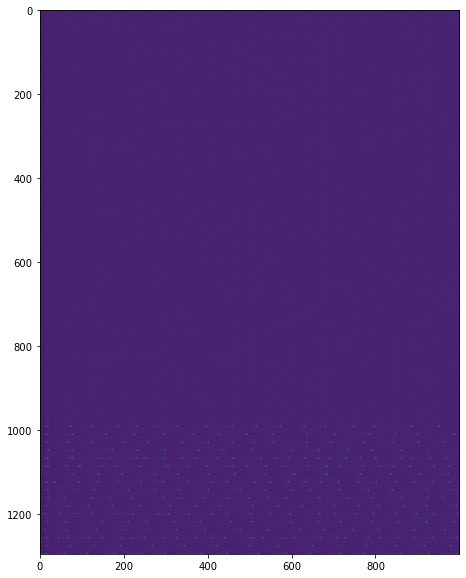

In [139]:
voltage_out = voltage.copy()
voltage_out[voltage_out >= 30] = 30

h, w = voltage_out.shape

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(voltage_out) 
#plt.colorbar()

#ax.set_aspect(w/h)
plt.show()

In [ ]:
def firing_stats(firings):
    if not isinstance(firings, np.ndarray):
        firings = np.array(firings)
    if len(firings.shape) == 1:
        firings_count = firings.sum()
        return firings.sum()
        
    firings_count = firings.sum(1)
    return {'max': np.max(firings_count), 'min': np.min(firings_count), 'mean': np.mean(firings_count), 'median': np.median(firings_count)}